In [52]:
import os
import json
import pandas as pd
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt
# import the seaborn stylesheet
import seaborn as sns
sns.set()

from camelsp import Bundesland, util


In [53]:
nuts = [nt for nt in os.listdir(Bundesland('Hessen').base_path) if nt.startswith('DE')]

In [54]:
# Get the data for all NUTS regions in all Bundesländer
q_list = []
w_list = []
for ID in nuts:
    print(ID)
    with Bundesland(ID) as bl:
        nuts_ids = bl.nuts_table.nuts_id.values
        with warnings.catch_warnings(record=True) as warn:
            for id in nuts_ids:
                try:
                    data = bl.get_data(id)
                    # only keep data whichi si not empty
                    if not data.empty:
                        # Also check if there are duplicates in the index
                        if not data.index.duplicated().any():
                            q_list.append(data["q"])
                            w_list.append(data["w"])

                except Exception as e:
                    warnings.warn(str(e))

            if len(warn) > 0:
                print(f"There were {len(warn)} warnings (missing data files).")


DEF
DED
DE9
There were 282 warnings (missing data files).
DEE
There were 80 warnings (missing data files).
DE1
DEC
DEA
There were 209 warnings (missing data files).
DE8
DEG
DE4
There were 232 warnings (missing data files).
DE2
DE7


In [55]:
def merge_series_to_df(series_list):
    """
    Merges a list of pandas series into one dataframe.
    Using index as the key.
    """
    df = pd.concat(series_list, keys=[f's{i+1}' for i in range(len(series_list))], axis=1)
    return df


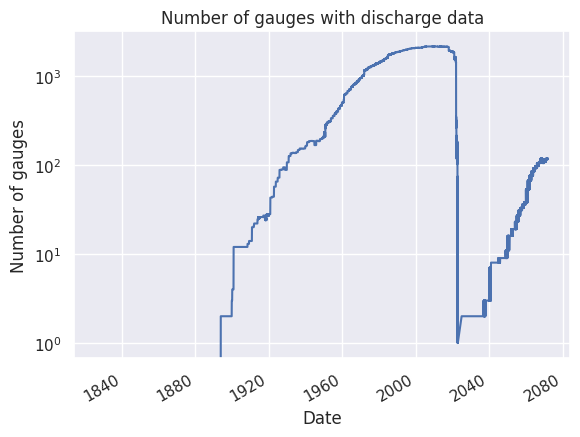

In [59]:
q_df = merge_series_to_df(q_list)
ax = q_df.count(axis=1).plot()
ax.set_ylabel('Number of gauges')
ax.set_xlabel('Date')
ax.set_title('Number of gauges with discharge data')
ax.set_yscale('log')

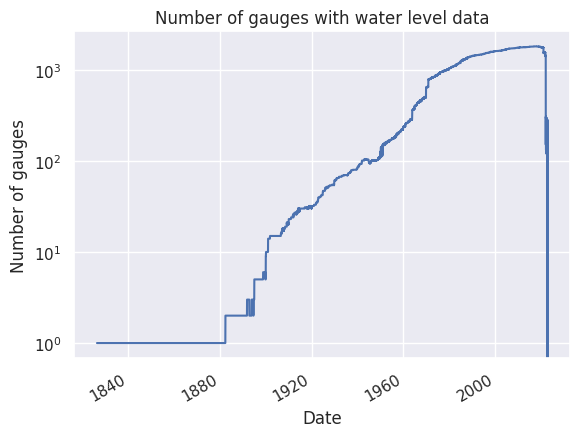

In [60]:
w_df = merge_series_to_df(w_list)
ax = w_df.count(axis=1).plot()
ax.set_ylabel('Number of gauges')
ax.set_xlabel('Date')
ax.set_title('Number of gauges with water level data')
ax.set_yscale('log')
